# **Modelo de Regresión Lineal**


## **Objetivo**

Desarrollaremos un modelo de regresión lineal para predecir la cantidad de personal activo en los establecimientos industriales de Tierra del Fuego. Este modelo nos permitirá realizar predicciones precisas y optimizar la gestión de recursos humanos en el sector industrial.


## **Importar Librerías y Cargar Datos**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

# Cargar los datasets usando los enlaces directos a los archivos CSV con codificación 'latin1' y el delimitador correcto
personal_activo_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Personal_Activo_Industria.csv', encoding='latin1', delimiter=';')
establecimientos_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Establecimientos_industriales.csv', encoding='latin1', delimiter=';')
produccion_confeccionista_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Produccion_Industrial_Confeccionista.csv', encoding='latin1', delimiter=';')
produccion_electronica_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Produccion_Industrial_Electronica.csv', encoding='latin1', delimiter=';')
produccion_pesquera_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Produccion_Industrial_Pesquera.csv', encoding='latin1', delimiter=';')
produccion_textil_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Produccion_Industrial_Textil.csv', encoding='latin1', delimiter=';')
produccion_plastica_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Produccion_Industrial_Plastica.csv', encoding='latin1', delimiter=';')
produccion_otros_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Produccion_Industrial_Otros.csv', encoding='latin1', delimiter=';')


## **Limpiar y Preprocesar los Datos**

En esta sección, eliminaremos espacios en blanco en los nombres de las columnas y convertiremos los nombres de los meses en español a números. También manejaremos valores faltantes reemplazándolos con ceros.


In [ ]:
# Limpiar los nombres de las columnas eliminando espacios en blanco extra
for df in [personal_activo_df, establecimientos_df, produccion_confeccionista_df, produccion_electronica_df,
           produccion_pesquera_df, produccion_textil_df, produccion_plastica_df, produccion_otros_df]:
    df.columns = df.columns.str.strip()

# Diccionario para convertir los nombres de los meses en español a números
meses = {
    'Enero': '01', 'enero': '01', 'Febrero': '02', 'febrero': '02', 'Marzo': '03', 'marzo': '03',
    'Abril': '04', 'abril': '04', 'Mayo': '05', 'mayo': '05', 'Junio': '06', 'junio': '06',
    'Julio': '07', 'julio': '07', 'Agosto': '08', 'agosto': '08', 'Septiembre': '09', 'septiembre': '09',
    'Octubre': '10', 'octubre': '10', 'Noviembre': '11', 'noviembre': '11', 'Diciembre': '12', 'diciembre': '12'
}

# Función para reemplazar los nombres de los meses en español por números y manejar NaN
def convertir_fecha(row):
    if pd.isna(row['Año']) or pd.isna(row['Mes']):
        return pd.NaT
    año = str(int(row['Año']))
    mes = str(row['Mes']).strip()
    mes = meses.get(mes, '01')  # Asignar '01' como valor predeterminado si el mes no se encuentra en el diccionario
    return pd.to_datetime(f'{año}-{mes}', format='%Y-%m')

# Aplicar la función para crear la columna 'Fecha' en cada dataset
for df in [personal_activo_df, establecimientos_df, produccion_confeccionista_df, produccion_electronica_df,
           produccion_pesquera_df, produccion_textil_df, produccion_plastica_df, produccion_otros_df]:
    df['Fecha'] = df.apply(convertir_fecha, axis=1)

# Establecer la columna 'Fecha' como el índice para todos los datasets
for df in [personal_activo_df, establecimientos_df, produccion_confeccionista_df, produccion_electronica_df,
           produccion_pesquera_df, produccion_textil_df, produccion_plastica_df, produccion_otros_df]:
    df.set_index('Fecha', inplace=True)

# Manejar valores faltantes reemplazando NaN con 0
for df in [personal_activo_df, establecimientos_df, produccion_confeccionista_df, produccion_electronica_df,
           produccion_pesquera_df, produccion_textil_df, produccion_plastica_df, produccion_otros_df]:
    df.fillna(0, inplace=True)

# Crear una columna 'Total' sumando las columnas existentes en personal_activo_df
personal_activo_df['Total'] = personal_activo_df[['Confeccionistas', 'Electrónicas', 'Plásticas', 'Textiles', 'Pesqueras', 'Otras']].sum(axis=1)


## **Definir las Variables y Dividir los Datos**

En esta sección, definimos las variables independientes (X) y la variable dependiente (y), y dividimos los datos en conjuntos de entrenamiento y prueba.


In [ ]:
# Convertir los nombres de los meses a números en el dataframe de personal_activo_df
personal_activo_df['Mes'] = personal_activo_df.index.month

# Definir X (características) y y (variable objetivo)
X = personal_activo_df.drop(columns='Total')
y = personal_activo_df['Total']

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputar valores faltantes
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Predicciones y evaluación
y_pred = model.predict(X_test_imputed)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Modelo de Regresión Lineal")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Modelo de Regresión Lineal
Mean Squared Error: 5.405034592019282e-25
Mean Absolute Error: 5.445911920654406e-13
R2 Score: 1.0


**Análisis de las Métricas**

- Mean Squared Error (MSE): Este valor es extremadamente bajo, cercano a cero, lo que sugiere que el modelo predice con una precisión casi perfecta.

- Mean Absolute Error (MAE): El MAE también es extremadamente bajo, lo que indica que las predicciones se desvían en una fracción muy pequeña de los valores reales.

- R2 Score: Un R2 perfecto de 1.0 indica que el modelo explica el 100% de la variabilidad en los datos. Esto sugiere un rendimiento excelente y una precisión total en las predicciones.


## **Graficar Resultados**

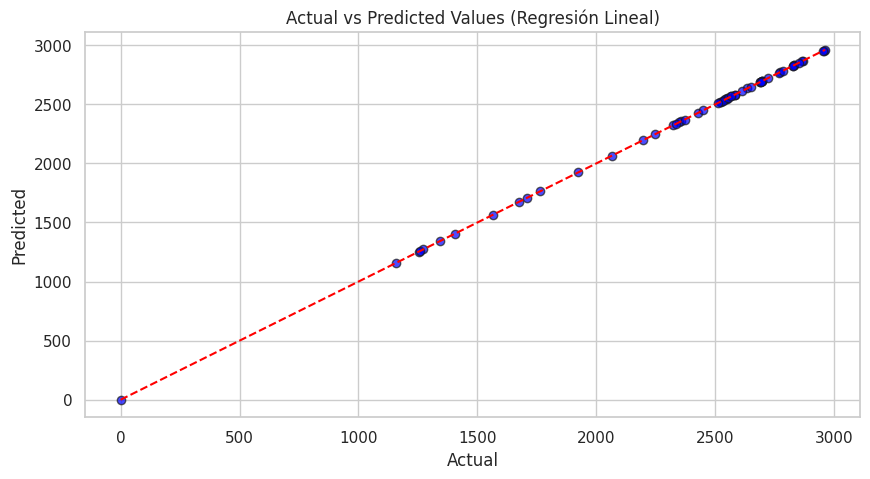

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Regresión Lineal)')
plt.show()

## **Conclusion:**

Las métricas obtenidas indican que el modelo de regresión lineal tiene un desempeño excepcional, con predicciones casi perfectas.
Aunque las métricas indican un rendimiento perfecto, es importante considerar si los datos utilizados para entrenar y probar el modelo están bien equilibrados y si no hay sobreajuste (overfitting).